In [121]:
#import random

#with open("../2021_22/data/dialogs_movies/Action/15minutes_dialog.txt", "r") as file:
 #   my_dialog = file.read()
  #  words = list(map(str, my_dialog.split()))

   # print(random.choice(words))

[-0.553, 0, -0.349, 0, '#sadness', '#disgust', 'negative', -0.451, 'uncalled_for', 'unwant', 'unfriendless', 'cast_off', 'unwelcome']


In [122]:
#for each_genre in dialogs_movies:
    #for each_file in dialogs :
        #readlines regex


In [31]:
import os
#import csv

path = "./data/dialogs_movies"

for folder in os.listdir(path):
    # print(folder)
    for file in os.listdir(path+"/"+folder):
        with open("../2021_22/data/dialogs_movies/"+folder+"/"+file, "r") as f :
            document = f.read()

            # Fermer après read() et stocker dans variable
            # Stocker après dans CSV 1 script/tableau
            #if "speaker.found" :
             #   my_speeches[speaker]=""
            #elif "speech.found" :
             #   my_speech [speaker]=[speech.found]
            #else :
                # "not in RG"
             #   pass

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [124]:
from pywsd import disambiguate

print(disambiguate('I went to the bank to deposit my money'))

[('I', None), ('went', Synset('run_low.v.01')), ('to', None), ('the', None), ('bank', Synset('bank.n.09')), ('to', None), ('deposit', Synset('deposit.v.02')), ('my', None), ('money', Synset('money.n.03'))]


In [125]:
from pywsd import disambiguate
import pandas as pd
from nltk.corpus import wordnet as wn
import re

print(disambiguate('I went to the bank to deposit my money'))

disambiguate_dialog_df = pd.DataFrame(disambiguate('i went to the bank to deposit my money because they abandon your money hello'),
                                      columns = ["Word", "Synset"])

print(disambiguate_dialog_df)

[('I', None), ('went', Synset('run_low.v.01')), ('to', None), ('the', None), ('bank', Synset('bank.n.09')), ('to', None), ('deposit', Synset('deposit.v.02')), ('my', None), ('money', Synset('money.n.03'))]
       Word                  Synset
0         i                    None
1      went  Synset('run_low.v.01')
2        to                    None
3       the                    None
4      bank     Synset('bank.n.09')
5        to                    None
6   deposit  Synset('deposit.v.02')
7        my                    None
8     money    Synset('money.n.03')
9   because                    None
10     they                    None
11  abandon   Synset('vacate.v.02')
12     your                    None
13    money    Synset('money.n.03')
14    hello    Synset('hello.n.01')


In [126]:
import senticnet
phrase = "abandon i went to the bank to deposit my money"
words = phrase.split(" ")
for word in words :
    if word in senticnet.senticnet:
        print(senticnet.senticnet[word])
    else :
        print("sorry")

[-0.553, 0, -0.349, 0, '#sadness', '#disgust', 'negative', -0.451, 'uncalled_for', 'unwant', 'unfriendless', 'cast_off', 'unwelcome']
sorry
sorry
sorry
sorry
sorry
sorry
[-0.917, 0, -0.795, 0, '#grief', '#loathing', 'negative', -0.856, 'impudent', 'alluvial', 'brash', 'rock', 'insensitive']
sorry
[0, 0.253, 0.091, 0, '#serenity', '#acceptance', 'positive', 0.172, 'sticker', 'dollar_sign', 'monetary', 'value', 'money_value']


In [127]:
list_1st_emotion = []
list_2nd_emotion = []

for w in disambiguate_dialog_df["Word"]:
    #wm=w.lower()

    if w in senticnet.senticnet.keys():
        #mylist = senticnet.senticnet[wm]
        #print(f'key for word {wm} : {senticnet.senticnet[wm]} which sentiments are : {senticnet.senticnet[wm][4]} and {mylist[5].strip("#")}')
        list_1st_emotion.append(senticnet.senticnet[w][4])
        list_2nd_emotion.append(senticnet.senticnet[w][5])
    elif w in senticnet.senticnet.values():
        list_1st_emotion.append(senticnet.senticnet[w][4])
        list_2nd_emotion.append(senticnet.senticnet[w][5])
        print("Synonyme")
    elif w not in senticnet.senticnet.keys() and senticnet.senticnet.values() :
        check_w = wn.synsets(w)
        if check_w:
            word = wn.synsets(w)[0]
            check_hypernym = word.hypernyms()
            if check_hypernym :
                hypernym_word = word.hypernyms()[0]
                regex = re.compile("(?<=Synset\(')[^_.]+")
                regex_word = str(regex.findall(str(hypernym_word)))
                ok_word_1 = regex_word.replace("['", "")
                ok_word_2 = ok_word_1.replace("']", "")
                if ok_word_2 in senticnet.senticnet.keys() or senticnet.senticnet.values() :
                    emotion_1 = senticnet.senticnet[ok_word_2][4]
                    emotion_2 = senticnet.senticnet[ok_word_2][5]
                    list_1st_emotion.append(emotion_1)
                    list_2nd_emotion.append(emotion_2)
            else :
                list_1st_emotion.append("not found")
                list_2nd_emotion.append("not found")
        else:
            list_1st_emotion.append("not found")
            list_2nd_emotion.append("not found")

disambiguate_dialog_df["1st Emotion"] = list_1st_emotion
disambiguate_dialog_df["2nd Emotion"] = list_2nd_emotion

print(disambiguate_dialog_df)

       Word                  Synset  1st Emotion  2nd Emotion
0         i                    None       #grief    #loathing
1      went  Synset('run_low.v.01')    not found    not found
2        to                    None    not found    not found
3       the                    None    not found    not found
4      bank     Synset('bank.n.09')       #grief    #loathing
5        to                    None    not found    not found
6   deposit  Synset('deposit.v.02')       #grief    #loathing
7        my                    None    not found    not found
8     money    Synset('money.n.03')    #serenity  #acceptance
9   because                    None    not found    not found
10     they                    None    not found    not found
11  abandon   Synset('vacate.v.02')     #sadness     #disgust
12     your                    None    not found    not found
13    money    Synset('money.n.03')    #serenity  #acceptance
14    hello    Synset('hello.n.01')  #enthusiasm         None


In [128]:
dog = wn.synset('dog.n.01')
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [129]:
dog = wn.synsets('dog')[0]
hypernym_dog = dog.hypernyms()[0]
print(hypernym_dog)
regex = re.compile("(?<=Synset\(')[^.]+")
regex_dog = str()
regex_dog = str(regex.findall(str(hypernym_dog)))
print(regex_dog)
ok_dog_1 = regex_dog.replace("['", "")
ok_dog_2 = ok_dog_1.replace("']", "")
print(ok_dog_2)
print(senticnet.senticnet[ok_dog_2][4])

Synset('canine.n.02')
['canine']
canine
#responsiveness


In [130]:
if ok_dog_2 in senticnet.senticnet.keys() :
    print("hello")

hello


In [131]:
to = wn.synsets("to")
print(to)
if to :
    print("hello")

[]


In [132]:
went = wn.synsets("went")[0]
hypernym_went = went.hypernyms()
print(hypernym_went)
if hypernym_went:
    print("ça marche")

[]


In [2]:
from pywsd import disambiguate
import pandas as pd
values= [['Rohan','abandon i went to the bank to deposit my money'],['Elvish','abandon i went to the bank to deposit my money'],['Deepak','abandon i went to the bank to deposit my money'],
        ]

disambigauted_df = pd.DataFrame(values,columns=['speaker','speech'])

disambigauted_df=disambigauted_df.astype('string')
disambigauted_df['disambiguated']=disambigauted_df.speech.apply(lambda x: disambiguate(x))

print(disambigauted_df)

for each in disambigauted_df.disambiguated:
    for word,synset in each:
        print(f'this is my word {word} and this is my synset {synset}')



  speaker                                          speech  \
0   Rohan  abandon i went to the bank to deposit my money   
1  Elvish  abandon i went to the bank to deposit my money   
2  Deepak  abandon i went to the bank to deposit my money   

                                       disambiguated  
0  [(abandon, Synset('wildness.n.01')), (i, None)...  
1  [(abandon, Synset('wildness.n.01')), (i, None)...  
2  [(abandon, Synset('wildness.n.01')), (i, None)...  
this is my word abandon and this is my synset Synset('wildness.n.01')
this is my word i and this is my synset None
this is my word went and this is my synset Synset('run_low.v.01')
this is my word to and this is my synset None
this is my word the and this is my synset None
this is my word bank and this is my synset Synset('bank.n.09')
this is my word to and this is my synset None
this is my word deposit and this is my synset Synset('deposit.v.02')
this is my word my and this is my synset None
this is my word money and this is my 

In [17]:
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
def synonym_antonym_extractor():
    phrase="I went to the bank to deposit my money"
    mots = phrase.split(" ")

    for mot in mots:
        synonyms = []
        for syn in wordnet.synsets(mot):
            for l in syn.lemmas():
                synonyms.append(l.name())
        if synonyms:
            print(synonyms[0])

synonym_antonym_extractor()

iodine
travel
bank
deposit
money


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wimve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
speaker = [A-Z]{2}.+

speech = ^(?![A-Z]{2}).*$

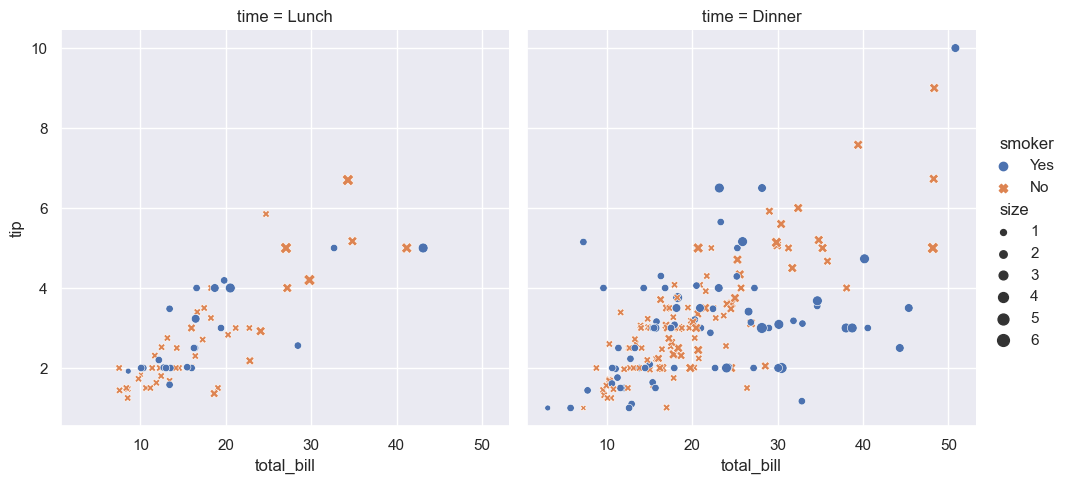

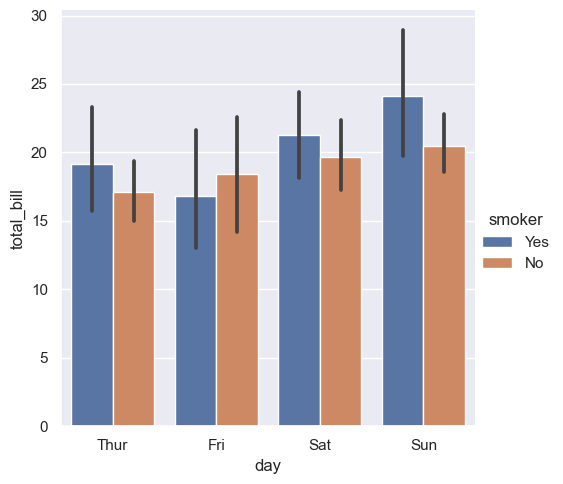

In [4]:
import pandas as pd
import seaborn as sns

sns.set_theme()

tips = sns.load_dataset("tips")

sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

  speaker                                          speech  \
0   Rohan                                     hello world   
1   Rohan  abandon i went to the bank to deposit my money   
2  Deepak                                  this is a test   

                                       disambiguated  
0  [(hello, Synset('hello.n.01')), (world, Synset...  
1  [(abandon, Synset('wildness.n.01')), (i, None)...  
2  [(this, None), (is, None), (a, None), (test, S...  


<AxesSubplot:xlabel='speaker', ylabel='Count'>

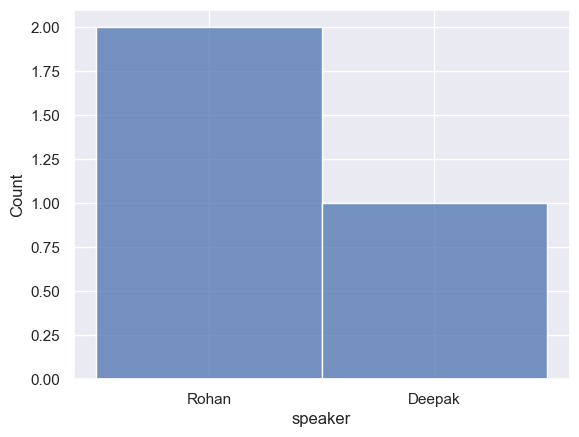

In [23]:
from pywsd import disambiguate
import pandas as pd
import seaborn as sns

values= [['Rohan','hello world'],['Rohan','abandon i went to the bank to deposit my money'],['Deepak','this is a test'],
        ]

disambigauted_df = pd.DataFrame(values,columns=['speaker','speech'])

disambigauted_df=disambigauted_df.astype('string')
disambigauted_df['disambiguated']=disambigauted_df.speech.apply(lambda x: disambiguate(x))

print(disambigauted_df)

sns.set_theme()

sns.histplot(data=disambigauted_df, x="speaker")